In [7]:
import matplotlib.pyplot as plt
import cv2
from numpy import std, ptp, median
from scipy.stats import skew, kurtosis, mstats
import eeglib
import joblib
from sklearn import preprocessing
import pandas as pd
import os

In [8]:
'''
Load all classifiers
Each of the five classifiers was trained using 56,000 monochromatic images, link to the training dataset:
https://ieee-dataport.org/open-access/steganalysis-still-images-lsb-steganography-features-dataset
'''
svm_classifier = joblib.load('trained_classifiers/svm-classifier.joblib')
knn_classifier = joblib.load('trained_classifiers/knn-classifier.joblib')
rf_classifier = joblib.load('trained_classifiers/rf-classifier.joblib')
mlp_classifier = joblib.load('trained_classifiers/mlp-classifier.joblib')
nb_classifier = joblib.load('trained_classifiers/nb-classifier.joblib')

   Kurtosis   Skewness          Std    Range   Median   Geometric_Mean  \
0   7.47907    2.32575  1493.443619  10098.0    409.0              0.0   

    Mobility   Complexity  
0   0.707152      1.27835  


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:283: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


'clean'

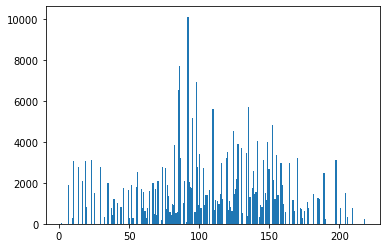

In [20]:
def stego_or_clean(img_path, classifier):
    '''
        This function returns the type of the image: either clean or stego, using the chosen classifier
        IMPORTANT: 
            - There's a chance of misclassification in case of non-monochromatic/high-resolution images,
            - The model detects only LSB Steganography
        This limitation is due to the training dataset, which does not provide a wide range of images.
    '''
    im = cv2.imread(img_path)
    vals = im.mean(axis=2).flatten()
    # plot histogram with 255 bins
    b, bins, patches = plt.hist(vals, 255)
    data = {'Kurtosis' : [kurtosis(b)], 
        ' Skewness' : [skew(b)], 
        ' Std' : [std(b)], 
        ' Range' : [ptp(b)],
        ' Median': [median(b)],
        ' Geometric_Mean': [mstats.gmean(b)],
        ' Mobility': [eeglib.features.hjorthMobility(b)],
        ' Complexity': [eeglib.features.hjorthComplexity(b)]
       }
    df = pd.DataFrame(data)
    print(df)
    testing_data = pd.read_csv('train_test_datasets/features_test_70000.csv')
    x_test, y_test = testing_data.drop([' Tag'], axis=1), testing_data[' Tag']
    x_test = x_test.append(df, ignore_index=True)
    
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    x_test = scaler.fit_transform(x_test)
    
    return 'stego' if classifier.predict([x_test[13999]])[0] == 1 else 'clean'

#choose an image to apply the steganalysis using the chosen classifier
stego_or_clean('image.jpg', rf_classifier)